# Imports

In [1]:
import os
import re
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [2]:
data = pd.read_csv('../data/toxic_data.csv')

# Show Samples

In [3]:
data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
125358,9e8ee0af14a4c1c5,"""== Turkey etc. ==\n\nHallo !\n\nTurkey and th...",0,0,0,0,0,0
43957,75533d7b73f87e9f,No I copied it verbatum from the History of th...,0,0,0,0,0,0
121704,8b24c05202f52b67,That is one explanation. Though I think there'...,0,0,0,0,0,0
102377,23e55090e8651b61,Can we at least try not to be a mouthpiece for...,0,0,0,0,0,0
99428,13e4a1abe996440e,""":::There's no need to speak in videogame ling...",0,0,0,0,0,0


# Show Labels Distributions

In [4]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check empty values (NaN)

In [5]:
data.isna().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

# No imputation is required since we don't have any missing values

In [6]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

## check length of texts distribution

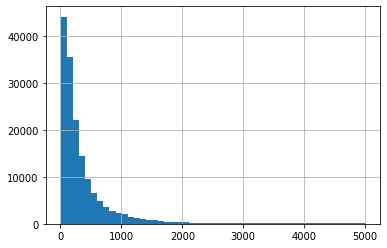

In [7]:
data.comment_text.apply(len).hist(bins=50);

## check distributions of classes

In [8]:
class_columns = data.columns[2:]

In [9]:
class_columns_sum = data[class_columns].sum()

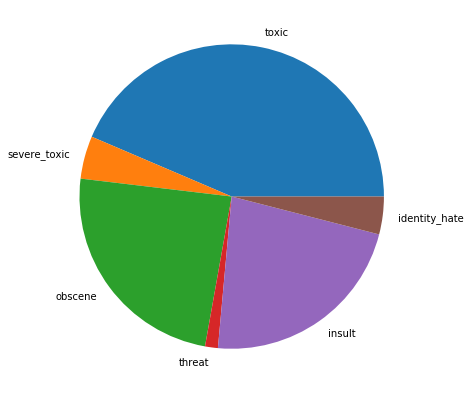

In [10]:
plt.figure(figsize=(15, 7))
plt.pie(class_columns_sum, labels=class_columns_sum.index);

## check percentage of unlabeled samples

In [13]:
class_percentages = class_columns_sum/data.shape[0]

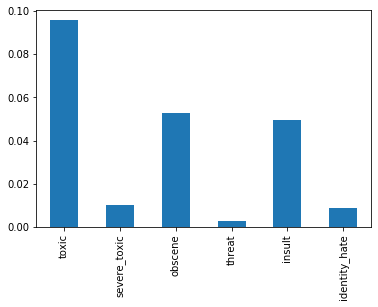

In [16]:
class_percentages.plot.bar();

In [17]:
data.shape

(159571, 8)

# Rename text column to match Prodigy Requirements

In [18]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [22]:
data.rename(mapper={'comment_text':'text'}, axis=1, inplace=True)

# Save Data

In [23]:
data.to_csv('../data/preprocessed_data.csv')

# Take only labeled & multi-class examples

In [25]:
labeled_data = data[data[class_columns].sum(axis=1) > 1]

In [26]:
labeled_data.shape

(9865, 8)

In [27]:
labeled_data.to_csv('../data/preprocessed_labeled_data.csv')

# Take samples from each class to find some patterns

- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate

In [42]:
samples_per_class = {}

In [50]:
for class_name in class_columns:
    candidates = data[
        (data[class_name] == 1) & (data[class_columns].sum(axis=1) == 1)
    ].text
    
    if candidates.shape[0] == 0:
        candidates = data[data[class_name] == 1].text
        
    samples_per_class[class_name] = candidates.sample(10, random_state=0).values.tolist()

In [51]:
[len(item) for item in samples_per_class.values()]

[10, 10, 10, 10, 10, 10]

In [41]:
def beautiful_print(texts):
    sep = '-'*50+'\n'
    for text in texts:
        print(sep+text+sep)

## toxic

In [53]:
beautiful_print(samples_per_class['toxic'])

--------------------------------------------------
"::::::""You know?  My neighbor is famous and I think he's gay.  The people down the road hate his guts and have surely testified.  Some have told me that these people have said so, but some other people don't have a clue or care one way or the other, while some have actually investigated the matter and found it nothing.""'  24.255.11.149  

"--------------------------------------------------

--------------------------------------------------
"

It's not nonsense he really is a virgin

Hi, fuck off, this is my User Talk page, who the hell reverts it to an old version?  Do you not have a life?

Thomas ""Virgin"" Keller has surely never had sex."--------------------------------------------------

--------------------------------------------------
You really are a pretentious twat, aren't you?--------------------------------------------------

--------------------------------------------------
your right bro, your so right.....not! i hat

## severe toxic

In [55]:
beautiful_print(samples_per_class['severe_toxic'])

--------------------------------------------------
I SWEAR TO FUCKING CHRIST, LEAVE ME ALONE!!!!!!!!!!!!!!! I.T.'S.  M.Y. P.A.G.E.!!!!!!!!!!!! WHY DO YOU CHANGE????? ARE YOU SOME PERVERTED  STALKER!!!!!!!!!!!!!!!!!!!!!!!!--------------------------------------------------

--------------------------------------------------
FUCK YOU 

Fuck You keep blocking me I'll keep coming back, Are so fucking bored that you have to sit around and fuck with me on the goddamn computer. Get a life ASSHOLE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!--------------------------------------------------

--------------------------------------------------
suck my dick i dont give a fuck--------------------------------------------------

--------------------------------------------------
soulja bitch is whack, fuck da dirty south--------------------------------------------------

--------------------------------------------------
Oral sex 

Lay off the fellatio page, cumshitter.-------------------------------------

## obscene

In [56]:
beautiful_print(samples_per_class['obscene'])

--------------------------------------------------
Re Radiojerk talk page
See WP: BLOW ME for what I think of you and RadioJerk.--------------------------------------------------

--------------------------------------------------
"

Erroneous comment stricken. Still, don't delete comments outright just because you don't think they're appropriate. There's nothing in the rules that forbids casual use of words like ""fuck"" on discussion pages. Also, what I posted above is not an attack. I mention this because one of your friends coming to your aid accused me of attacking you."--------------------------------------------------

--------------------------------------------------
"

This needed to be clarified since there has been a problem with him inserting subsequent posts ahead of mine, which can be misleading to a reader. When I tried to correct the positions yesterday in another incident, here is what he wrote in his edit summary when he positioned his post ahead of mine again:

01:5

## threat

In [57]:
beautiful_print(samples_per_class['threat'])

--------------------------------------------------
That may be the case, but there is still no ambiguity over the repulsiveness of irish nationalists, who deserved to be shot dead. 79.75.141.101--------------------------------------------------

--------------------------------------------------
"

New Award

Well Done!!!

  The IAmTheCoinMan You Are Really Annoying And You Are Good At Anti-Vandalism Barnstar I, , award you the The IAmTheCoinMan You Are Really Annoying And You Are Good At Anti-Vandalism Barnstar for your multiple prompt reverts to my joke.  Protecting the wiki isn't important, and an unimportant task under that is protecting other wikipedians!  Your efforts are much much not appreciated.  I hope someone cuts of your hands! "--------------------------------------------------

--------------------------------------------------
I'ma smack ya upside da head wit a shovel. 

I'm takin ya down, boi.--------------------------------------------------

--------------------------

## insult

In [58]:
beautiful_print(samples_per_class['insult'])

--------------------------------------------------
"

 Hi Marcuse. I see you've run into Sojambi Pinola. don't mind him, he's a buffoon. He is friend of Biff Rose's. They mention each other on their respective web spots. Looks like the two of them are on here basahing other people until they stand alone as edit king. Too bad someone else wrote about Rose's own anti semiticism, and racism. Poor Sojambi has been trying to fix it ever since. The sad thing is, he is so one sided, he has a difficult time persuading others of his NPOV- therefore he lashes out, and you were caught up in the crossfire(evidence here[]) Notice, he's only comparing what he wants you to see. the connection? well there isn't any really, but by creative use of wiki skills he tries to cover his own manipulations by using hanging you up as the villain. It's a rather typical obfuscation tehnique. By accusing every person who posts something that makes an edit to his work, he then marks them as a bad user. It's also rem

## identity_hate

In [59]:
beautiful_print(samples_per_class['identity_hate'])

--------------------------------------------------
The Jews who keep trolling this article are merely trying to cause a problem.  If they weren't then why are they always together, Jewish and all on topics even just slightly related to Jews?  Maybe they should learn to read Polish?  God forbid that I would stick up for the little guy, whilst these jackasses won't stop their ganging up.  I've already been threatened with a promise by--------------------------------------------------

--------------------------------------------------
Gay Hatred 

Ah I see you are a homophobe just like Joakim Noah. Maybe one day people can live in peace but until then we just have to put up with people like you.--------------------------------------------------

--------------------------------------------------
holocaust was needed by the whole humanity--------------------------------------------------

--------------------------------------------------
I too agree with you, after seeing the POV changes